In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [20]:
params_dic = {}
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response] = {}

## Load France parameters and mobility_heat

In [21]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/thi_france_params_4SD_precip.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/france/THI_mobility_heat_w_vars_90_4SD_precip.csv")



#### format variables for every year (as opposed to categorical), format binary variable for duration and coast

### make subset dataframe for every activity-type variable

In [22]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [23]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [24]:
df['variable'].unique()

array(['FP_Intercept_residential_difference',
       'FP_Intercept_workplaces_difference',
       'FP_Intercept_transit_difference',
       'FP_Intercept_grocery_pharmacy_difference',
       'FP_Intercept_retail_difference', 'FP_Intercept_parks_difference',
       'FP_thi_heat_centered_residential_difference',
       'FP_thi_heat_centered_workplaces_difference',
       'FP_thi_heat_centered_transit_difference',
       'FP_thi_heat_centered_grocery_pharmacy_difference',
       'FP_thi_heat_centered_retail_difference',
       'FP_thi_heat_centered_parks_difference',
       'FP_temp_diff_residential_difference',
       'FP_temp_diff_workplaces_difference',
       'FP_temp_diff_transit_difference',
       'FP_temp_diff_grocery_pharmacy_difference',
       'FP_temp_diff_retail_difference', 'FP_temp_diff_parks_difference',
       'FP_rain_standard_heat_residential_difference',
       'FP_rain_standard_heat_workplaces_difference',
       'FP_rain_standard_heat_transit_difference',
       'FP_

In [25]:
residential

,index,variable,estimate,workplaces,residential,parks,grocery_pharmacy,retail,transit
0,0,FP_Intercept_residential_difference,1.386004,0,1,0,0,0,0
1,6,FP_thi_heat_centered_residential_difference,0.211577,0,1,0,0,0,0
2,12,FP_temp_diff_residential_difference,0.131464,0,1,0,0,0,0
3,18,FP_rain_standard_heat_residential_difference,-0.010982,0,1,0,0,0,0
4,24,FP_rain_standard_control_residential_difference,-0.025929,0,1,0,0,0,0
5,30,FP_heatwave_durTrue_residential_difference,0.621791,0,1,0,0,0,0
6,36,FP_stage_frac_residential_difference,2.778441,0,1,0,0,0,0
7,42,FP_weekend1_residential_difference,-2.371186,0,1,0,0,0,0
8,48,FP_popden_dec_residential_difference,0.010822,0,1,0,0,0,0
9,54,FP_HDI_dec_residential_difference,-0.011930,0,1,0,0,0,0


In [26]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'transit', 'grocery_pharmacy']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]




In [27]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popdens_de'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(), 
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])
        

    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





## Iterate through repsonses and states, create dictionary with intercepts and slopes

In [28]:
state = 'France'
for response in ['workplaces', 'residential', 'retail', 'parks','transit', 'grocery_pharmacy']:
    params_dic[response][state] = get_average_effects(dic, response, state)



In [29]:
params_dic

{'workplaces': {'France': [0.0869162984834823, -13.672500360132283]},
 'residential': {'France': [0.211576673730168, 3.4933456296530263]},
 'grocery_pharmacy': {'France': [-0.200727816664931, -1.7569863090728672]},
 'retail': {'France': [-0.682155387238783, -3.129342562282098]},
 'parks': {'France': [-1.79726695906807, 46.86630535235073]},
 'transit': {'France': [-0.184333786722054, 3.886662702480904]}}

## Load Brazil parameters and mobility_heat

In [30]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_brazil_params_4SD_precip.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/brazil/THI_mobility_heat_w_vars_90_4SD_precip.csv")



### make subset dataframe for every activity-type variable

In [31]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [32]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [33]:
transit

,index,variable,estimate,workplaces,residential,parks,grocery_pharmacy,retail,transit
0,2,FP_Intercept_transit_difference,-4.085813,0,0,0,0,0,1
1,8,FP_thi_centered_transit_difference,-0.604869,0,0,0,0,0,1
2,14,FP_thi_diff_transit_difference,-0.073284,0,0,0,0,0,1
3,20,FP_rain_standard_heat_transit_difference,-0.028971,0,0,0,0,0,1
4,26,FP_rain_standard_control_transit_difference,-0.025201,0,0,0,0,0,1
5,32,FP_heatwave_durTrue_transit_difference,-2.378406,0,0,0,0,0,1
6,38,FP_stage_frac_transit_difference,-0.502693,0,0,0,0,0,1
7,44,FP_weekend1_transit_difference,-1.063878,0,0,0,0,0,1
8,50,FP_popden_dec_transit_difference,0.545507,0,0,0,0,0,1
9,56,FP_HDI_dec_transit_difference,-0.000104,0,0,0,0,0,1


In [34]:
dic = {}
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'parks', 'retail', 'transit']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]



In [35]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popdens_de'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean()])
        

    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [36]:
state='Brazil'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response][state] = get_average_effects(dic, response, state)


## Load India parameters and mobility_heat

In [37]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_india_params_4SD_precip.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/india/THI_mobility_heat_w_vars_90_4SD_precip.csv")



### make subset dataframe for every activity-type variable

In [38]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [39]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [40]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'transit', 'grocery_pharmacy']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]



In [41]:
transit

,index,variable,estimate,workplaces,residential,parks,grocery_pharmacy,retail,transit
0,2,FP_Intercept_transit_difference,8.415393,0,0,0,0,0,1
1,8,FP_thi_centered_transit_difference,-0.236658,0,0,0,0,0,1
2,14,FP_thi_diff_transit_difference,-0.098650,0,0,0,0,0,1
3,20,FP_rain_standard_heat_transit_difference,-0.057437,0,0,0,0,0,1
4,26,FP_rain_standard_control_transit_difference,0.004968,0,0,0,0,0,1
5,32,FP_heatwave_durTrue_transit_difference,-0.988210,0,0,0,0,0,1
6,38,FP_stage_frac_transit_difference,-2.655030,0,0,0,0,0,1
7,44,FP_weekend1_transit_difference,-0.130399,0,0,0,0,0,1
8,50,FP_popden_dec_transit_difference,-0.123693,0,0,0,0,0,1
9,56,FP_HDI_dec_transit_difference,0.164487,0,0,0,0,0,1


In [42]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['thi_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popdens_de'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(), 
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])


    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





### Add to params dic

In [43]:
state = 'India'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response][state] = get_average_effects(dic, response, state)


In [44]:
params_dic

{'workplaces': {'France': [0.0869162984834823, -13.672500360132283],
  'Brazil': [-0.339861190012958, 1.9718745478337931],
  'India': [-0.0280005001343269, -6.04352892551498]},
 'residential': {'France': [0.211576673730168, 3.4933456296530263],
  'Brazil': [0.0196457729030996, -0.2679453618810532],
  'India': [0.0319926864394725, -0.36880997819776273]},
 'grocery_pharmacy': {'France': [-0.200727816664931, -1.7569863090728672],
  'Brazil': [0.254665339162822, -0.7326468331866463],
  'India': [-0.462884860884232, -5.721312934730672]},
 'retail': {'France': [-0.682155387238783, -3.129342562282098],
  'Brazil': [0.189157762805146, -0.03360796950550937],
  'India': [-0.457886277307207, -4.50813366160158]},
 'parks': {'France': [-1.79726695906807, 46.86630535235073],
  'Brazil': [-0.907397600519517, 0.28820381239216086],
  'India': [-0.486499970585271, 7.812091922334328]},
 'transit': {'France': [-0.184333786722054, 3.886662702480904],
  'Brazil': [-0.604869280231717, -0.7141902306263903],
 

## Load US parameters and mobility_heat

In [45]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_united_states_params_4SD_precip.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/united_states/THI_mobility_heat_w_vars_90_4SD_precip.csv")



### make subset dataframe for every activity-type variable

In [46]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [47]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [48]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'transit', 'grocery_pharmacy']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]






In [49]:
transit

,index,variable,estimate,workplaces,residential,parks,grocery_pharmacy,retail,transit
0,2,FP_Intercept_transit_difference,-2.297542,0,0,0,0,0,1
1,8,FP_thi_centered_transit_difference,-0.106919,0,0,0,0,0,1
2,14,FP_thi_diff_transit_difference,0.051147,0,0,0,0,0,1
3,20,FP_rain_standard_heat_transit_difference,-0.033473,0,0,0,0,0,1
4,26,FP_rain_standard_control_transit_difference,0.027323,0,0,0,0,0,1
5,32,FP_heatwave_durTrue_transit_difference,-0.901409,0,0,0,0,0,1
6,38,FP_stage_frac_transit_difference,1.304711,0,0,0,0,0,1
7,44,FP_weekend1_transit_difference,0.106734,0,0,0,0,0,1
8,50,FP_popden_dec_transit_difference,0.118858,0,0,0,0,0,1
9,56,FP_HDI_dec_transit_difference,-0.103301,0,0,0,0,0,1


In [50]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['thi_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popden_dec'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(),
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])




    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [51]:
state = 'United States'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response][state] = get_average_effects(dic, response, state)


In [52]:
params_dic

{'workplaces': {'France': [0.0869162984834823, -13.672500360132283],
  'Brazil': [-0.339861190012958, 1.9718745478337931],
  'India': [-0.0280005001343269, -6.04352892551498],
  'United States': [0.0164847012465208, -1.65724844793735]},
 'residential': {'France': [0.211576673730168, 3.4933456296530263],
  'Brazil': [0.0196457729030996, -0.2679453618810532],
  'India': [0.0319926864394725, -0.36880997819776273],
  'United States': [0.051973863492883, 1.3985269106327134]},
 'grocery_pharmacy': {'France': [-0.200727816664931, -1.7569863090728672],
  'Brazil': [0.254665339162822, -0.7326468331866463],
  'India': [-0.462884860884232, -5.721312934730672],
  'United States': [-0.260103330554466, 0.300281455234133]},
 'retail': {'France': [-0.682155387238783, -3.129342562282098],
  'Brazil': [0.189157762805146, -0.03360796950550937],
  'India': [-0.457886277307207, -4.50813366160158],
  'United States': [-0.157925561151296, -0.9109619341732884]},
 'parks': {'France': [-1.79726695906807, 46.866

## Load turkey parameters and mobility_heat

In [53]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_turkey_params_4SD_precip.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/turkey/THI_mobility_heat_w_vars_90_4SD_precip.csv")



### make subset dataframe for every activity-type variable

In [54]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]


In [55]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [56]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'grocery_pharmacy', 'transit']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_control'] = subset.iloc[3,2]
    dic[response]['rain_normed_heat'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]




In [57]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popden_dec'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(),
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])




    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    print(global_int)
    print(variable_sum)
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [58]:
state = 'Turkey'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks', 'transit']:
    params_dic[response][state] = get_average_effects(dic, response, state)



7.44895825042178
-6.344729048895328
0.979653844154464
-0.954674176649288
-5.93773374819859
8.703188329642302
-1.32094442589589
3.5312473884936497
-16.8828389415834
16.513961656829956
-9.51851278936409
8.709501387694408


In [59]:
params_dic['transit']

{'France': [-0.184333786722054, 3.886662702480904],
 'Brazil': [-0.604869280231717, -0.7141902306263903],
 'India': [-0.236658304791638, 3.055664122681038],
 'United States': [-0.106919479348809, -0.8294039387541332],
 'Turkey': [-0.428465120200107, -0.8090114016696823]}

## Load Nigeria parameters and mobility_heat

In [81]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_nigeria_params_4SD_precip_v2.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/nigeria/THI_mobility_heat_w_vars_90_4SD_precip.csv")



In [82]:
df

,variable,estimate
0,FP_Intercept_residential_difference,5.058980
1,FP_Intercept_workplaces_difference,19.284551
2,FP_Intercept_transit_difference,35.107242
3,FP_Intercept_retail_difference,17.071963
4,FP_thi_centered_residential_difference,0.003985
5,FP_thi_centered_workplaces_difference,1.050899
6,FP_thi_centered_transit_difference,0.925347
7,FP_thi_centered_retail_difference,0.610031
8,FP_temp_diff_residential_difference,0.142303
9,FP_temp_diff_workplaces_difference,-0.203628


### make subset dataframe for every activity-type variable

In [83]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]


In [84]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()


### Format params into dataframe

In [86]:
dic = {}
for response in ['workplaces', 'residential', 'transit', 'retail',]:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['stage_frac'] = subset.iloc[5,2]
    dic[response]['weekend'] = subset.iloc[6,2]
    dic[response]['heatwave_dur'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['coast'] = subset.iloc[9,2]



In [87]:
mob_vars['popden_dec']

0       10
1       10
2       10
3       10
4       10
        ..
1439     9
1440     9
1441     9
1442     9
1443     9
Name: popden_dec, Length: 1444, dtype: int64

In [88]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popden_dec'].mean().mean()])



    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [89]:
state = 'Nigeria'
for response in ['workplaces', 'residential',  'transit', 'retail']:
    params_dic[response][state] = get_average_effects(dic, response, state)

params_dic['parks'][state] = [0, 0]
params_dic['grocery_pharmacy'][state] = [0, 0]



In [90]:
params_dic['retail']

{'France': [-0.682155387238783, -3.129342562282098],
 'Brazil': [0.189157762805146, -0.03360796950550937],
 'India': [-0.457886277307207, -4.50813366160158],
 'United States': [-0.157925561151296, -0.9109619341732884],
 'Turkey': [0.104813278197808, 2.2103029625977597],
 'Nigeria': [0.6100305002877, 12.69487383059613]}

In [91]:
concat = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/THI_concat_mobility_heat_w_vars_90_4SD.csv")


In [92]:
france = concat[concat['adm0'] == 'France']
brazil = concat[concat['adm0'] == 'Brazil']
india = concat[concat['adm0'] == 'India']
united_states = concat[concat['adm0'] == 'United States']
united_states = united_states[united_states['adm1'] != 'Alaska']

turkey = concat[concat['adm0'] == 'Turkey']

nigeria = concat[concat['adm0'] == 'Nigeria']




In [93]:
brazil

,Unnamed: 0,adm0,adm1,adm2,location,Heat Wave Duration,heatwave_dur,diff,thi_heat,thi_diff,...,HDI_dec,coast,mean_elev,elev_1500m,residential_difference,workplaces_difference,transit_difference,grocery_pharm_difference,retail_rec_difference,parks_difference
483,0,Brazil,Acre,Brasileia,"Brasileia, Acre",3.0,False,NaN,36.349238,1.790843,...,1,0,273.885524,0,NaN,-47.0,NaN,NaN,NaN,NaN
484,1,Brazil,Acre,Brasileia,"Brasileia, Acre",2.0,False,NaN,36.300824,4.387705,...,1,0,273.885524,0,NaN,-22.0,NaN,NaN,NaN,NaN
485,2,Brazil,Acre,Cruzeiro do Sul,"Cruzeiro do Sul, Acre",3.0,False,NaN,37.442874,3.613034,...,1,0,224.920316,0,1.0,-59.0,NaN,NaN,-46.0,NaN
486,5,Brazil,Acre,Epitaciolandia,"Epitaciolandia, Acre",2.0,False,NaN,36.636966,2.169123,...,1,0,242.503561,0,NaN,-43.0,NaN,NaN,NaN,NaN
487,6,Brazil,Acre,Epitaciolandia,"Epitaciolandia, Acre",2.0,False,NaN,37.156134,5.050413,...,1,0,242.503561,0,NaN,-21.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,11391,Brazil,Sao Paulo,Vera Cruz,"Vera Cruz, Sao Paulo",3.0,False,NaN,34.702673,3.599967,...,10,0,551.601942,0,NaN,10.0,NaN,NaN,NaN,NaN
4161,11393,Brazil,Sao Paulo,Vinhedo,"Vinhedo, Sao Paulo",2.0,False,NaN,32.235104,4.510247,...,10,0,741.339623,0,-2.0,-2.0,-1.0,-1.0,8.0,-4.0
4162,11395,Brazil,Sao Paulo,Viradouro,"Viradouro, Sao Paulo",3.0,False,NaN,34.812829,1.722113,...,10,0,546.496241,0,NaN,0.0,NaN,NaN,NaN,NaN
4163,11398,Brazil,Sao Paulo,Votorantim,"Votorantim, Sao Paulo",2.0,False,NaN,31.345278,3.512190,...,10,0,769.791304,0,-2.0,2.0,-20.0,3.0,3.0,NaN


In [94]:
def plot_regression(response, params_dic):
    
    
    br_line = np.poly1d(params_dic[response]['Brazil'])
    fr_line = np.poly1d(params_dic[response]['France'])
    in_line = np.poly1d(params_dic[response]['India'])
    tu_line = np.poly1d(params_dic[response]['Turkey'])
    us_line = np.poly1d(params_dic[response]['United States'])
    ng_line = np.poly1d(params_dic[response]['Nigeria'])


    x_axis = np.linspace(-10,10,20)

    
    br_x_axis = np.linspace(brazil['thi_heat'].min(),brazil['thi_heat'].max(),20)
    br_y_axis = br_line(x_axis)
    
    fr_x_axis = np.linspace(france['thi_heat'].min(),france['thi_heat'].max(),20)
    fr_y_axis = fr_line(x_axis)
    
    
    in_x_axis = np.linspace(india['thi_heat'].min(),india['thi_heat'].max(),20)
    in_y_axis = in_line(x_axis)
    
    tu_x_axis = np.linspace(turkey['thi_heat'].min(),turkey['thi_heat'].max(),20)
    tu_y_axis = tu_line(x_axis)

    
    us_x_axis = np.linspace(united_states['thi_heat'].min(),united_states['thi_heat'].max(),20)
    us_y_axis = us_line(x_axis)

    ng_x_axis = np.linspace(nigeria['thi_heat'].min(),nigeria['thi_heat'].max(),20)
    ng_y_axis = ng_line(x_axis)


    
    fig, ax = plt.subplots(figsize=(8, 6))
    pos = ax.get_position()
    
    
    #min_y = np.concatenate([bc_y_axis, wa_y_axis, or_y_axis, ca_y_axis]).min() 
    #max_y = np.concatenate([bc_y_axis, wa_y_axis, or_y_axis, ca_y_axis]).max() 


    plt.plot(x_axis + brazil['thi_heat'].mean(), br_y_axis, label='Brazil', color='green')
    plt.plot(x_axis + france['thi_heat'].mean(), fr_y_axis, label='France', color='blue')
    plt.plot(x_axis + india['thi_heat'].mean(), in_y_axis, label='India', color='orange')
    plt.plot(x_axis + turkey['thi_heat'].mean(), tu_y_axis, label='Turkey', color='red')
    plt.plot(x_axis + united_states['thi_heat'].mean(), us_y_axis, label='United States', color='black')
    plt.plot(x_axis + nigeria['thi_heat'].mean(), ng_y_axis, label='Nigeria', color='purple')


    
    plt.title(f"Percent change in {response} activity with heat wave temperature")
    plt.xlabel(f"Heat wave temperature (C)")
    plt.ylabel(f"Percent change in mobility")
    plt.tight_layout()
    #ax.set_position([pos.x0, pos.y0, pos.width * 0.8, pos.height])
    plt.legend()
    #plt.savefig(data_path + f'paper2/results/reg_plots/{response}.png', dpi=400)


    plt.show()

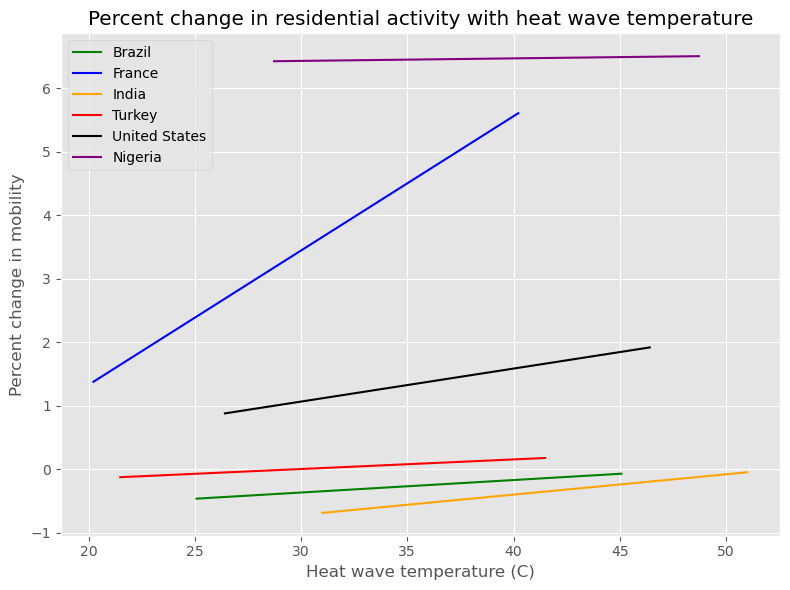

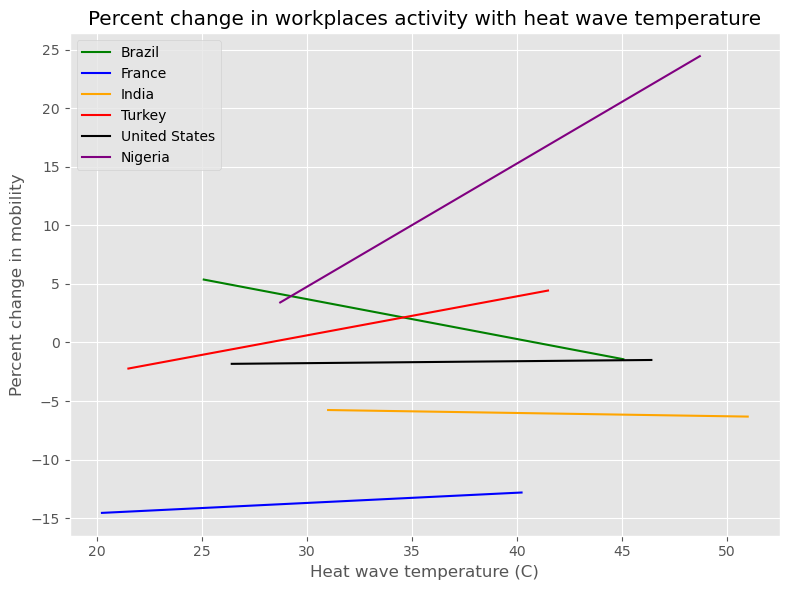

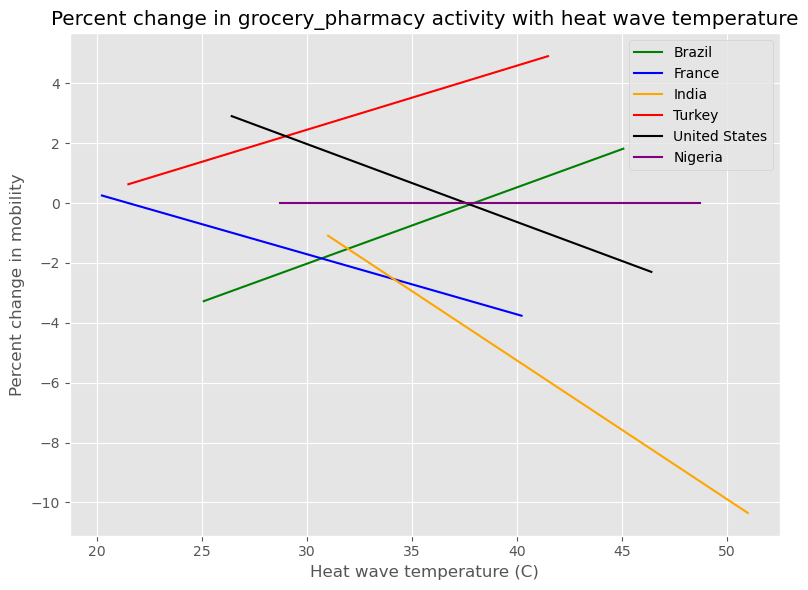

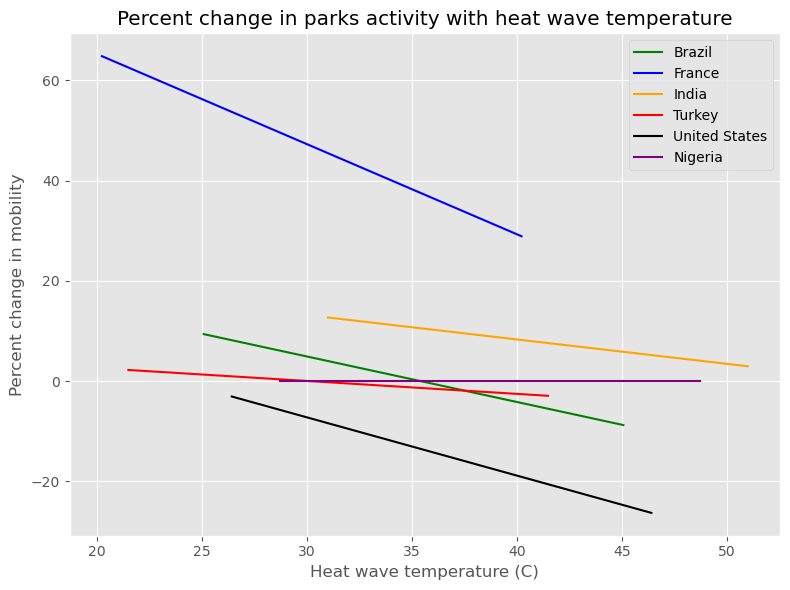

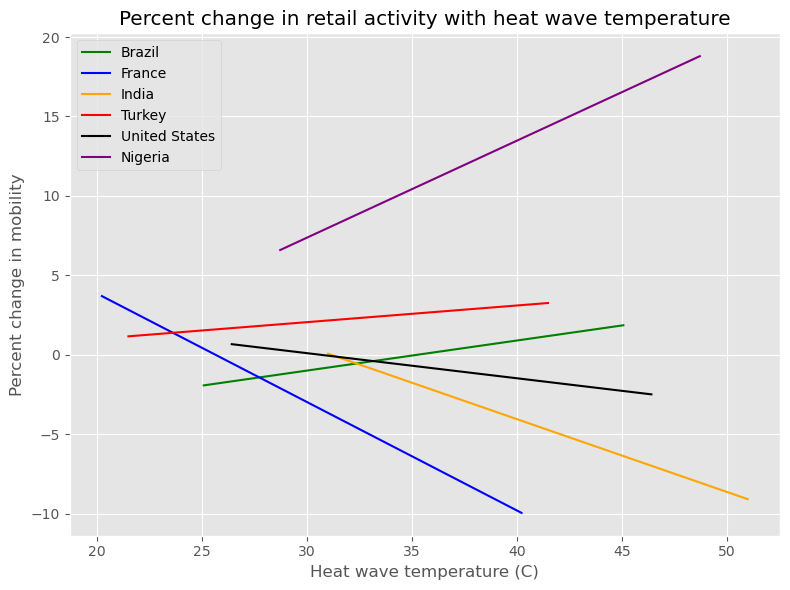

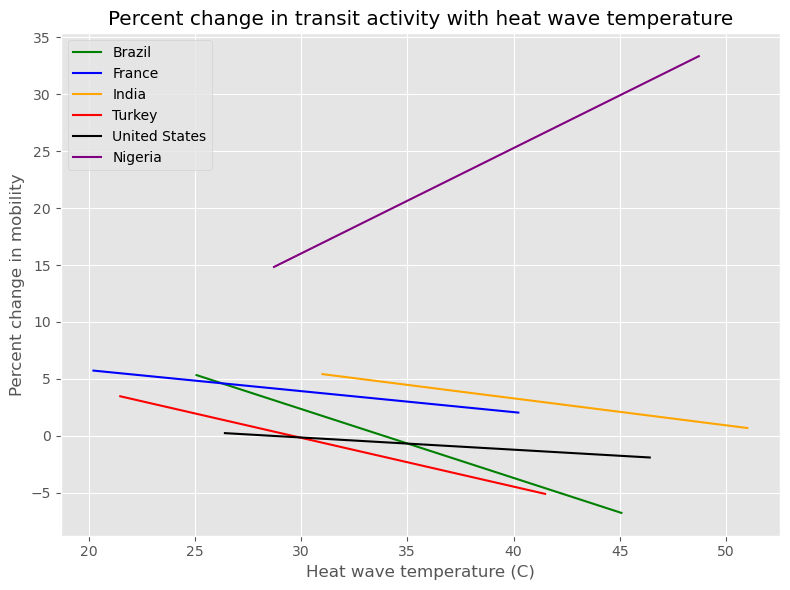

In [95]:
plot_regression('residential', params_dic)
plot_regression('workplaces', params_dic)
plot_regression('grocery_pharmacy', params_dic)
plot_regression('parks', params_dic)
plot_regression('retail', params_dic)
plot_regression('transit', params_dic)


### Create function which gathers average effects for each state into a dataframe

In [57]:
master = pd.DataFrame()
for response in ['residential', 'workplaces', 'transit', 'grocery_pharmacy', 'retail', 'parks']:
    
    br_line = np.poly1d(params_dic[response]['Brazil'])
    fr_line = np.poly1d(params_dic[response]['France'])
    in_line = np.poly1d(params_dic[response]['India'])
    tu_line = np.poly1d(params_dic[response]['Turkey'])
    us_line = np.poly1d(params_dic[response]['United States'])
    ng_line = np.poly1d(params_dic[response]['Nigeria'])


    x_axis = np.linspace(-10,10,20)


    
    
    br_x_axis = np.linspace(brazil['thi_heat'].min(),brazil['thi_heat'].max(),20)
    br_y_axis = br_line(x_axis)
    
    fr_x_axis = np.linspace(france['thi_heat'].min(),france['thi_heat'].max(),20)
    fr_y_axis = fr_line(x_axis)
    
    in_x_axis = np.linspace(india['thi_heat'].min(),india['thi_heat'].max(),20)
    in_y_axis = in_line(x_axis)
    
    tu_x_axis = np.linspace(turkey['thi_heat'].min(),turkey['thi_heat'].max(),20)
    tu_y_axis = tu_line(x_axis)

    us_x_axis = np.linspace(united_states['thi_heat'].min(),united_states['thi_heat'].max(),20)
    us_y_axis = us_line(x_axis)
    
    ng_x_axis = np.linspace(nigeria['thi_heat'].min(),nigeria['thi_heat'].max(),20)
    ng_y_axis = ng_line(x_axis)


    
    br = pd.DataFrame(br_x_axis, br_y_axis)
    fr = pd.DataFrame(fr_x_axis, fr_y_axis) 
    ind = pd.DataFrame(in_x_axis, in_y_axis)
    tu = pd.DataFrame(tu_x_axis, tu_y_axis)
    us = pd.DataFrame(us_x_axis, us_y_axis)
    ng = pd.DataFrame(ng_x_axis, ng_y_axis)


    br['state'] = 'Brazil'
    fr['state'] = 'France'
    ind['state'] = 'India'
    tu['state'] = 'Turkey'
    us['state'] = 'United States'
    ng['state'] = 'Nigeria'



    br.reset_index(inplace=True)
    fr.reset_index(inplace=True)
    ind.reset_index(inplace=True)
    tu.reset_index(inplace=True)
    us.reset_index(inplace=True)
    ng.reset_index(inplace=True)



    df = pd.concat([br, fr, ind, tu, us, ng])
    df['response'] = response
    
    master = pd.concat([master, df])

In [58]:
master.columns = ['change', 'temp', 'adm0', 'response']

In [59]:
master[master['change'] == 0]

,change,temp,adm0,response
0,0.0,30.836104,Nigeria,parks
1,0.0,31.389163,Nigeria,parks
2,0.0,31.942222,Nigeria,parks
3,0.0,32.495280,Nigeria,parks
4,0.0,33.048339,Nigeria,parks
5,0.0,33.601398,Nigeria,parks
6,0.0,34.154457,Nigeria,parks
7,0.0,34.707515,Nigeria,parks
8,0.0,35.260574,Nigeria,parks
9,0.0,35.813633,Nigeria,parks


In [60]:

master = master[(master['adm0'] != 'Nigeria') | (master['response'] != 'parks')]

In [61]:
master

,change,temp,adm0,response
0,-0.464403,27.170034,Brazil,residential
1,-0.443723,27.921305,Brazil,residential
2,-0.423044,28.672575,Brazil,residential
3,-0.402364,29.423845,Brazil,residential
4,-0.381684,30.175115,Brazil,residential
...,...,...,...,...
15,-21.426658,39.996122,United States,parks
16,-22.649301,41.169947,United States,parks
17,-23.871944,42.343773,United States,parks
18,-25.094586,43.517599,United States,parks


In [62]:
#save dataframe to re-create plots in R
master.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/results/THI_state_plots_precip.csv')

In [63]:
master = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/results/THI_state_plots_precip.csv')

In [64]:
dic = {}
dic['Brazil'] = {}
dic['Brazil']['residential'] = 0.20768
dic['Brazil']['workplaces'] = 0.96129
dic['Brazil']['transit'] = 2.74364
dic['Brazil']['grocery_pharmacy'] = 1.82506
dic['Brazil']['retail'] = 1.53435
dic['Brazil']['parks'] = 3.18855

dic['United States'] = {}
dic['United States']['residential'] = 0.09806
dic['United States']['workplaces'] = 0.19253
dic['United States']['transit'] = 0.73589
dic['United States']['grocery_pharmacy'] = 0.37271
dic['United States']['retail'] = 0.35087
dic['United States']['parks'] = 2.83222


dic['France'] = {}
dic['France']['residential'] = 0.60409
dic['France']['workplaces'] = 1.97308
dic['France']['transit'] = 6.92215
dic['France']['grocery_pharmacy'] = 5.07668
dic['France']['retail'] = 4.88456
dic['France']['parks'] = 22.81450


dic['Nigeria'] = {}
dic['Nigeria']['residential'] = 1.76431
dic['Nigeria']['workplaces'] = 3.51951
dic['Nigeria']['transit'] = 13.31062
dic['Nigeria']['grocery_pharmacy'] = 8.83059
dic['Nigeria']['retail'] = 9.93477


dic['Turkey'] = {}
dic['Turkey']['residential'] = 0.35296
dic['Turkey']['workplaces'] = 1.21374
dic['Turkey']['transit'] = 3.26694
dic['Turkey']['grocery_pharmacy'] = 2.41086
dic['Turkey']['retail'] = 2.11675
dic['Turkey']['parks'] = 9.93477

dic['India'] = {}
dic['India']['residential'] = 0.20169
dic['India']['workplaces'] = 1.09386
dic['India']['transit'] = 1.29485
dic['India']['grocery_pharmacy'] = 1.95359
dic['India']['retail'] =1.32772
dic['India']['parks'] = 2.13855


In [65]:
se_df = pd.DataFrame(dic).unstack().reset_index()

In [66]:
se_df.columns = ['adm0', 'response', 'SE']

In [67]:
se_df = se_df[(se_df['adm0'] != 'Nigeria') | (se_df['response'] != 'parks')]

In [68]:
master = master.merge(se_df, on=['adm0', 'response'], how='left')

In [69]:
master.head()

,Unnamed: 0,change,temp,adm0,response,SE
0,0,-0.464403,27.170034,Brazil,residential,0.20768
1,1,-0.443723,27.921305,Brazil,residential,0.20768
2,2,-0.423044,28.672575,Brazil,residential,0.20768
3,3,-0.402364,29.423845,Brazil,residential,0.20768
4,4,-0.381684,30.175115,Brazil,residential,0.20768


In [70]:
master['lower_ci'] = master['change'] - (master['SE'] * 1.96)
master['upper_ci'] = master['change'] + (master['SE'] * 1.96)

In [71]:
master.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/results/THI_state_plots_CI.csv')

In [73]:
master[(master['adm0'] == 'Nigeria') & (master['response'] == 'transit')]

,Unnamed: 0,change,temp,adm0,response,SE,lower_ci,upper_ci
340,0,33.588999,30.836104,Nigeria,transit,13.31062,7.500183,59.677814
341,1,32.771226,31.389163,Nigeria,transit,13.31062,6.682411,58.860041
342,2,31.953453,31.942222,Nigeria,transit,13.31062,5.864638,58.042268
343,3,31.135680,32.495280,Nigeria,transit,13.31062,5.046865,57.224496
344,4,30.317908,33.048339,Nigeria,transit,13.31062,4.229093,56.406723
345,5,29.500135,33.601398,Nigeria,transit,13.31062,3.411320,55.588950
346,6,28.682362,34.154457,Nigeria,transit,13.31062,2.593547,54.771178
347,7,27.864590,34.707515,Nigeria,transit,13.31062,1.775774,53.953405
348,8,27.046817,35.260574,Nigeria,transit,13.31062,0.958002,53.135632
349,9,26.229044,35.813633,Nigeria,transit,13.31062,0.140229,52.317859
